In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [6]:
# reflect an existing database into a new model
Base = automap_base()

In [7]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date[0])

2017-08-23


In [12]:
# Calculate the date 1 year ago from the last data point in the database
one_year_prior = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_prior)

2016-08-23


In [13]:
# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year_prior).\
    order_by(Measurement.date).all()
precipitation_data

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [14]:
# Unpack the `date` and `prcp` from precipitation_data and save into separate lists
date = [precipitation_data[0] for precipitation_data in precipitation_data]
precipitation = [precipitation_data[1] for precipitation_data in precipitation_data]
#print(date)
#print(precipitation)

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precip_df = pd.DataFrame({'Date': date, 'Precipitation': precipitation})
precip_df

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [16]:
# Sort the dataframe by date
precip_sorted_indexed = precip_df.set_index('Date')
precip_sorted_indexed

precip_sorted_date = precip_df.sort_values(by='Date', ascending=True)
precip_sorted_date.head()

#Filter out null values
precip_sorted = precip_sorted_date[precip_sorted_date[['Date', 'Precipitation']].notnull().all(1)]
precip_sorted

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
4,2016-08-24,1.22
5,2016-08-24,2.15
...,...,...
2218,2017-08-22,0.50
2221,2017-08-23,0.08
2219,2017-08-23,0.00
2220,2017-08-23,0.00


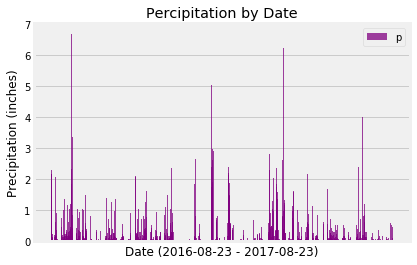

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(precip_sorted['Date'], precip_sorted['Precipitation'], facecolor="purple", alpha=0.75, align="center")
plt.xlabel('Date (2016-08-23 - 2017-08-23)')
plt.ylabel('Precipitation (inches)')
plt.title('Percipitation by Date')
plt.legend('precipitation', loc='best')
plt.xticks([], [])
plt.show()

![precipitation](Images/precipitation.png)

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = precip_sorted.describe().round(2)
summary_stats

,Precipitation
count,2015.00
mean,0.18
std,0.46
min,0.00
25%,0.00
50%,0.02
75%,0.13
max,6.70


![describe](Images/describe.png)

In [19]:
# Design a query to show how many stations are available in this dataset?
station_count = engine.execute("SELECT COUNT(station) FROM station")
for stations in station_count:
    print(f'There are {stations[0]} stations in this dataset.')

There are 9 stations in this dataset.


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Station.name, Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(Measurement.station.desc()).all()

active_stations

[('WAIKIKI 717.2, HI US', 'USC00519523', 24021),
 ('WAIKIKI 717.2, HI US', 'USC00519397', 24516),
 ('WAIKIKI 717.2, HI US', 'USC00519281', 24948),
 ('WAIKIKI 717.2, HI US', 'USC00518838', 4599),
 ('WAIKIKI 717.2, HI US', 'USC00517948', 12348),
 ('WAIKIKI 717.2, HI US', 'USC00516128', 23508),
 ('WAIKIKI 717.2, HI US', 'USC00514830', 19818),
 ('WAIKIKI 717.2, HI US', 'USC00513117', 24381),
 ('WAIKIKI 717.2, HI US', 'USC00511918', 17811)]

In [21]:
#Create dataframe to hold station data
locations = [active_stations[0] for active_stations in active_stations]
stations = [active_stations[1] for active_stations in active_stations]
occurences = [active_stations[2] for active_stations in active_stations]

#Display the DF
stations_df = pd.DataFrame({'Locations': locations, 'Stations': stations, 'Occurences': occurences})
stations_df

,Locations,Stations,Occurences
0,"WAIKIKI 717.2, HI US",USC00519523,24021
1,"WAIKIKI 717.2, HI US",USC00519397,24516
2,"WAIKIKI 717.2, HI US",USC00519281,24948
3,"WAIKIKI 717.2, HI US",USC00518838,4599
4,"WAIKIKI 717.2, HI US",USC00517948,12348
5,"WAIKIKI 717.2, HI US",USC00516128,23508
6,"WAIKIKI 717.2, HI US",USC00514830,19818
7,"WAIKIKI 717.2, HI US",USC00513117,24381
8,"WAIKIKI 717.2, HI US",USC00511918,17811


In [33]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active = session.query(Station.name, Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).limit(1)[0][1]
print(f'The most active station is station {most_active}.')

The most active station is station USC00519281.


In [44]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#lowest temp calc
lowest_temp = session.query(Measurement.station, func.min(Measurement.tobs)).\
    filter(Measurement.station == most_active).all()               
lowest_temp

print(f'The lowest temperature recorded at station {lowest_temp[0][0]} is {lowest_temp[0][1]}.')

The lowest temperature recorded at station USC00519281 is 54.0.


In [45]:
#highest temp calc
highest_temp = session.query(Measurement.station, func.max(Measurement.tobs)).\
    filter(Measurement.station == most_active).all()               
highest_temp

print(f'The highest temperature recorded at station {highest_temp[0][0]} is {highest_temp[0][1]}.')

The highest temperature recorded at station USC00519281 is 85.0.


In [55]:
#average temp calc
average_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active).all()               
average_temp

print(f'The highest temperature recorded at station {average_temp[0][0]} is {round(average_temp[0][1],1)}.')

The highest temperature recorded at station USC00519281 is 71.7.


In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [27]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [28]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [29]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [30]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [31]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [32]:
# Plot the daily normals as an area plot with `stacked=False`
